### Homework 7 — *College Student Success Analytics*
**Topics:** Pandas, NumPy, Matplotlib  

**Goal:**  For this homework, I want you to practices with pandas, numpy, and matplotlib but I want you also to practice figuring out what the data is telling us!  So, story-telling is a learning goal:)  

Two synthetic datasets describe **250 fictional Rhodes students**. 

| File | Rows | Description |
|------|------|-------------|
| `student_academic.csv` | 250 | One row per student: GPA, credits, study hours, attendance, etc. |
| `student_activities.csv` | 0–650 | One row per *activity* a student joins (0–3 per student) with hours/week & leadership flag |

---
## Task
The Dean of Students wants to know which factors predict academic success and whether co‑curricular involvement helps or hurts. Produce a short analytics report (and this reproducible notebook) that answers her questions.

---
## Part A — Data Wrangling *(15 pts)*
1. **Load & inspect** both CSVs (done above). Show shape and `dtypes`.
2. **Handle missing values** (~5 % already inserted). Choose a strategy to fix it **and justify it in the comments**.
3. **Add Three Columns** (GPA_change, StudyIntensity, AttendanceFlag) to the data frame calculated as follows:
```text
GPA_change          = GPA_Sem2 – GPA_Sem1
StudyIntensity = Hours_Study / Credits_Enrolled
AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0
```


In [335]:
#PART A: Data Wrangling

import numpy as np
import pandas as pd
academic=pd.read_csv("student_academic.csv")
activity=pd.read_csv("student_activities.csv")
print(academic.shape)
print(activity.shape)
print(academic.dtypes)
print(activity.dtypes)
academic_c=academic.dropna().copy()
activity_c=activity.dropna().copy()
# I chose to remove rows with missing values, because I will be calculating means and distribution which would be distorted with outlying zeroes.
academic_c["GPA_change"]=academic_c["GPA_Sem2"]-academic_c["GPA_Sem1"]
#print(academic_c["GPA_change"])
academic_c["StudyIntensity"]=academic_c["Hours_Study"]/academic_c["Credits_Enrolled"]
#print(academic_c["StudyIntensity"])
academic_c["AttendanceFlag"]=(academic_c["AttendanceRate"]>=0.9)#.astype(int)
print(academic_c)

(250, 9)
(364, 4)
StudentID             int64
Major                object
ClassYear            object
GPA_Sem1            float64
GPA_Sem2            float64
Credits_Enrolled      int64
Hours_Study         float64
AttendanceRate      float64
Scholarship          object
dtype: object
StudentID          int64
Activity          object
HoursPerWeek       int64
LeadershipRole    object
dtype: object
     StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
0         1001        Psychology   Freshman      3.86      3.68   
1         1002           English     Senior      3.01      3.29   
2         1003         Economics     Senior      3.23      3.23   
3         1004           English  Sophomore      2.96      2.85   
4         1005           English     Senior      2.93      2.92   
..         ...               ...        ...       ...       ...   
242       1243  Computer Science   Freshman      3.55      3.20   
245       1246         Economics     Senior      3.56      2.93   

---
## Part B — Exploratory Analyses *(55 pts)*
The difficulty of this problem that the data is contained in two different data sets.  They are connected by StudentID.  You'll need to google this and figure out how to *merge* the data.   Make sure you do it correctly.

| # | Question | Pts |
|---|----------|-----|
| 1 | **GPA shift.** Distribution of `GPA_change`. Print out the top 10 improvers. | 8 |
| 2 | **Study habits.** Pearson correlation between `StudyIntensity` and `GPA_Sem2`; Visualize with scatter and print out the Pearson correlation (in our notes).    | 8 |
| 3 | **Scholarships.** Mean & SD of `GPA_Sem2` for scholarship vs non‑scholarship.  Visualize this with box plot. | 6 |
| 4 | **Attendance.** Compute the average `GPA_Sem2` for `AttendanceFlag` = 1 vs 0. Visualize this with a bar chart. | 6 |
| 5 | **Activity load.** Compute total `Activity_Hours`; plot vs `GPA_Sem2`. | 6 |
| 6 | **Leadership.** Does *any* leadership role correspond to higher GPA?  Plot this with box plot (include average and std for each leadership role).  You might have to groupby...| 7 |
| 7 | **Major comparison.** For every major: mean GPA, mean study hours, scholarship %. Print out  and Visualize with a grouped bar chart. | 8 |
| 8 | **Predictive index.** Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable `SuccessScore`; list top 15. | 6 |

In [338]:
# Merge the data
merged_df=pd.merge(academic_c, activity, on="StudentID", how="inner")
print(merged_df)

     StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
0         1003         Economics     Senior      3.23      3.23   
1         1003         Economics     Senior      3.23      3.23   
2         1004           English  Sophomore      2.96      2.85   
3         1007         Economics  Sophomore      3.09      2.33   
4         1007         Economics  Sophomore      3.09      2.33   
..         ...               ...        ...       ...       ...   
298       1241         Economics   Freshman      3.10      3.25   
299       1242  Computer Science     Senior      3.25      3.72   
300       1242  Computer Science     Senior      3.25      3.72   
301       1248  Computer Science     Junior      3.11      3.19   
302       1250         Economics     Junior      3.43      2.84   

     Credits_Enrolled  Hours_Study  AttendanceRate Scholarship  GPA_change  \
0                  15         33.0            0.89          No        0.00   
1                  15         33.0     

In [340]:
# 1	GPA shift. Distribution of GPA_change. Print out the top 10 improvers.
print(f"The distribution of change in GPA can be analyzed using standard deviation: {merged_df["GPA_change"].std()}")
sorted_gpa=merged_df.sort_values(by=['GPA_change'], ascending=False)
print(sorted_gpa.head(10))

The distribution of change in GPA can be analyzed using standard deviation: 0.6281188655749753
     StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
81        1072           English     Junior      1.85      3.30   
80        1072           English     Junior      1.85      3.30   
79        1072           English     Junior      1.85      3.30   
243       1203  Computer Science     Junior      2.47      3.89   
244       1203  Computer Science     Junior      2.47      3.89   
245       1203  Computer Science     Junior      2.47      3.89   
106       1093         Economics     Junior      2.50      3.88   
107       1093         Economics     Junior      2.50      3.88   
105       1093         Economics     Junior      2.50      3.88   
270       1223         Economics  Sophomore      2.34      3.58   

     Credits_Enrolled  Hours_Study  AttendanceRate Scholarship  GPA_change  \
81                 14         11.0            0.96          No        1.45   
80         

 The Pearson correlation is -0.12784221828528963


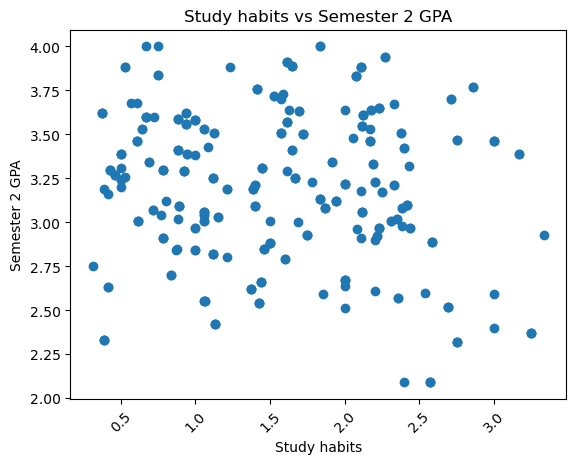

In [342]:
# 2	Study habits. Pearson correlation between StudyIntensity and GPA_Sem2; Visualize with scatter and print out the Pearson correlation (in our notes).
stud = merged_df['StudyIntensity'].to_numpy()
sem2 = merged_df['GPA_Sem2'].to_numpy()

# Pearson correlation via NumPy
corr = np.corrcoef(stud, sem2)
#print(corr)

#You see this is a matrix and the data we need is in the first row second column so I'm going to slice it out!
corr=corr[0,1]
print(f' The Pearson correlation is {corr}')

import matplotlib.pyplot as plt
plt.scatter(stud, sem2)
plt.xticks(rotation=45)
plt.xlabel("Study habits")
plt.ylabel("Semester 2 GPA")
plt.title("Study habits vs Semester 2 GPA")
plt.show()

             avg_sem2_GPA  std_sem2_GPA
Scholarship                            
No               3.152486      0.448677
Yes              3.265574      0.379323


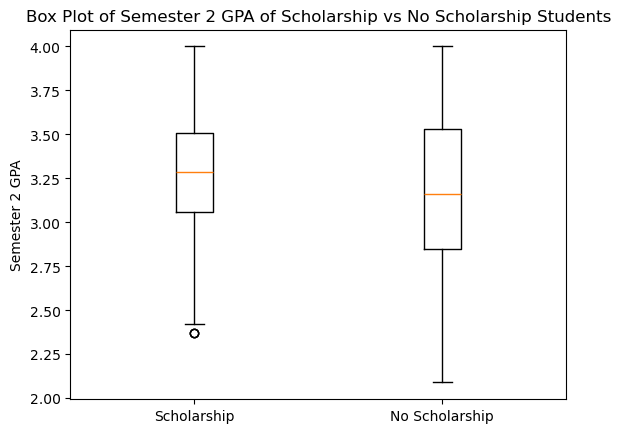

In [366]:
# 3	Scholarships. Mean & SD of GPA_Sem2 for scholarship vs non‑scholarship. Visualize this with box plot.
grouped = merged_df.groupby('Scholarship')

# Aggregate to compute the mean and count...you can only use .agg on data that has been grouped by:)
# Creates new columns (avg_engagement_rate and total_posts)
sem2_mean_sd = grouped.agg( avg_sem2_GPA=('GPA_Sem2', 'mean'),   std_sem2_GPA=('GPA_Sem2', 'std'))   
print(sem2_mean_sd)

scholarship=merged_df["Scholarship"].to_numpy()
#print(len(scholarship))
schol_mask_t=scholarship=="Yes"
schol_mask_f=scholarship=="No"
true=sem2[schol_mask_t]
false=sem2[schol_mask_f]
#print(len(true))
#print(len(false))

values=[true, false]

fig, ax = plt.subplots()
ax.boxplot(values)

# Set x-ticks
ax.set_xticks([1, 2])
ax.set_xticklabels(['Scholarship', 'No Scholarship'])

# Add labels and title
ax.set_ylabel('Semester 2 GPA')
ax.set_title('Box Plot of Semester 2 GPA of Scholarship vs No Scholarship Students')
plt.show()

                avg_sem2_GPA
AttendanceFlag              
False               3.258349
True                3.156632


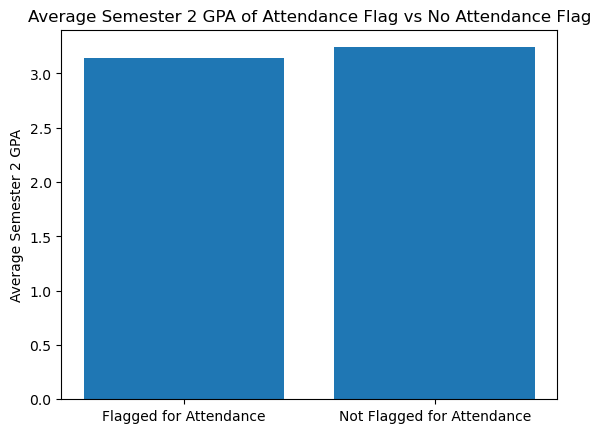

In [368]:
# 4	Attendance. Compute the average GPA_Sem2 for AttendanceFlag = 1 vs 0. Visualize this with a bar chart.
grouped = academic_c.groupby('AttendanceFlag')
sem2_mean = grouped.agg( avg_sem2_GPA=('GPA_Sem2', 'mean'))   
print(sem2_mean)
#grouped_lists = academic_c.groupby('AttendanceFlag')['GPA_Sem2'].agg(list)
#grouped_arrays = {k: np.array(v) for k, v in grouped_lists.items()}

#print(grouped_arrays.mean())
AttendanceFlag=merged_df["AttendanceFlag"].to_numpy()
att_mask_t=AttendanceFlag==True
att_mask_f=AttendanceFlag==False

true=sem2[att_mask_t]
false=sem2[att_mask_f]
mean_t=true.mean()
#print(mean_t)
mean_f=false.mean()
data = [mean_t, mean_f]

plt.ylabel('Average Semester 2 GPA')
plt.title('Average Semester 2 GPA of Attendance Flag vs No Attendance Flag')
plt.bar(["Flagged for Attendance","Not Flagged for Attendance"], data)

plt.show()

           total_act_hours  GPA_semester_2
StudentID                                 
1003                     2            3.23
1004                     1            2.85
1007                     3            2.33
1008                     1            3.04
1010                     1            4.00
...                    ...             ...
1239                     2            3.64
1241                     3            3.25
1242                     2            3.72
1248                     1            3.19
1250                     1            2.84

[147 rows x 2 columns]


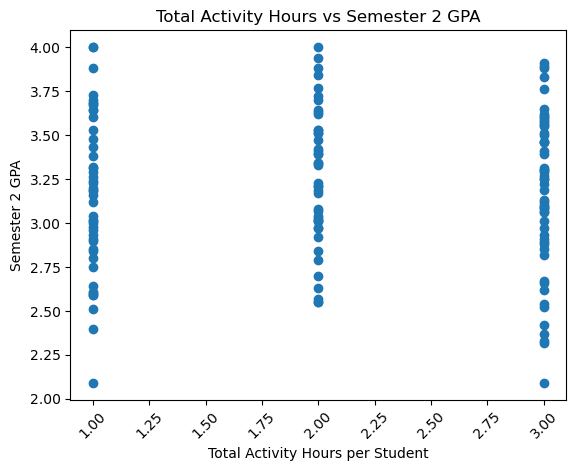

In [348]:
# 5	Activity load. Compute total Activity_Hours; plot vs GPA_Sem2.
grouped_student = merged_df.groupby('StudentID')
activity_GPA = grouped_student.agg(total_act_hours=("HoursPerWeek", "count"), GPA_semester_2=("GPA_Sem2", "mean"))
print(activity_GPA)
act=activity_GPA["total_act_hours"].to_numpy()
#print(len(activity_GPA["total_act_hours"].to_numpy()))
gpa=activity_GPA["GPA_semester_2"].to_numpy()
plt.scatter(act, gpa)
plt.xticks(rotation=45)
plt.xlabel("Total Activity Hours per Student")
plt.ylabel("Semester 2 GPA")
plt.title("Total Activity Hours vs Semester 2 GPA")
plt.show()

                gpa_mean   gpa_std
LeadershipRole                    
No              3.198807  0.431188
Yes             3.196000  0.411623


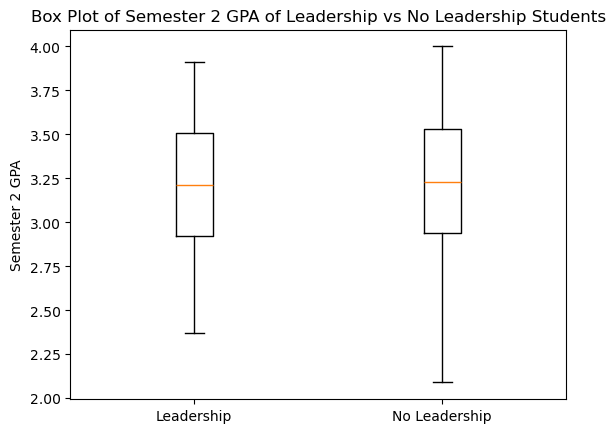

In [350]:
# 6	Leadership. Does any leadership role correspond to higher GPA? Plot this with box plot (include average and std for each leadership role). 
# You might have to groupby...	
# I took mean GPA from semester two only
grouped_leadership= merged_df.groupby("LeadershipRole")
#print(grouped_leadership)
leadership_GPA= grouped_leadership.agg(gpa_mean=("GPA_Sem2", "mean"), gpa_std=("GPA_Sem2", "std"))
print(leadership_GPA)
leadership=merged_df["LeadershipRole"].to_numpy()

lead_mask_t=leadership=="Yes"
lead_mask_f=leadership=="No"
yes=sem2[lead_mask_t]
no=sem2[lead_mask_f]


leads=[yes, no]
fig, ax = plt.subplots()


ax.boxplot(leads)

# Set x-ticks
ax.set_xticks([1, 2])
ax.set_xticklabels(['Leadership', 'No Leadership'])

# Add labels and title
ax.set_ylabel('Semester 2 GPA')
ax.set_title('Box Plot of Semester 2 GPA of Leadership vs No Leadership Students')
plt.show()

                   avg_GPA  avg_study  scholarship
Major                                             
Biology           3.238043  25.369565    39.130435
Computer Science  3.102958  24.647887    49.295775
Economics         3.089167  21.416667    33.333333
English           3.018605  21.883721    20.930233
Psychology        3.276620  23.197183    50.704225


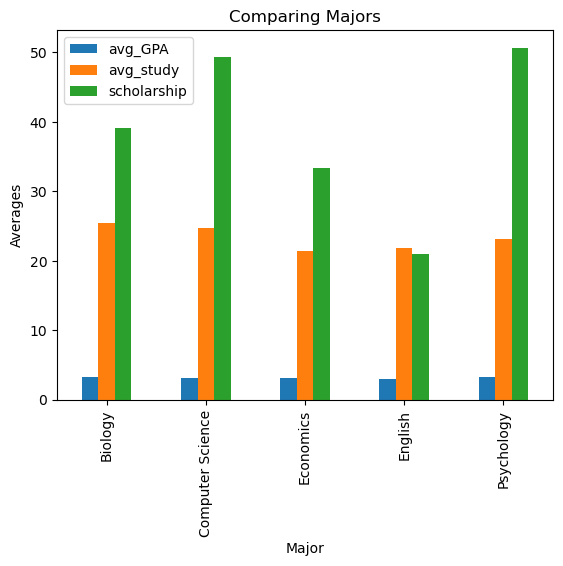

In [352]:
# 7	Major comparison. For every major: mean GPA, mean study hours, scholarship %. Print out and Visualize with a grouped bar chart.
# I took mean GPA from semester one only

grouped_majors = merged_df.groupby('Major')


major_GPA_study = grouped_majors.agg(avg_GPA=('GPA_Sem1', 'mean'),   avg_study=('Hours_Study', 'mean'), scholarship=("Scholarship", lambda x: (x=="Yes").mean()*100))   

print(major_GPA_study)
major_GPA_study.plot(kind='bar')
plt.title('Comparing Majors')
plt.xlabel('Major')
plt.ylabel('Averages')
plt.show()
#no matplotlib on exam

In [354]:
# 8	Predictive index. Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; 
# Call this variable SuccessScore; list top 15.
# I took mean GPA from semester one only
merged_df["success"]=merged_df["GPA_Sem1"]+merged_df["AttendanceRate"]+merged_df["Hours_Study"]
success_np=merged_df["success"].to_numpy()
success_mean=success_np.mean()
success_std=success_np.std()
#GPA_np=academic_c["GPA_Sem1"].to_numpy()
#att_np=academic_c["AttendanceRate"].to_numpy()
#study_np=academic_c["Hours_Study"].to_numpy()
#GPA_mean=GPA_np.mean
#GPA_std=GPA_np.std
#att_mean=att_np.mean
#att_std=att_np.std
#study_mean=study_np.mean
#study_std=study_np.std
z_scores = (success_np - success_mean) / success_std   #this is something you'll learn later if you haven't seen it before:) 
merged_df['SuccessScore'] = z_scores
#print(academic_c)
top15 = (merged_df.sort_values('SuccessScore', ascending=False))[:15]
print(top15)
#Am I supposed to calculate this by adding GPA, attendance, and study hours?

     StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
75        1070        Psychology     Junior      3.31      2.93   
14        1015        Psychology  Sophomore      4.00      2.40   
128       1111  Computer Science  Sophomore      2.98      3.77   
129       1111  Computer Science  Sophomore      2.98      3.77   
145       1126        Psychology  Sophomore      2.92      3.02   
144       1126        Psychology  Sophomore      2.92      3.02   
22        1021           Biology     Junior      3.44      2.37   
20        1021           Biology     Junior      3.44      2.37   
21        1021           Biology     Junior      3.44      2.37   
146       1127           English  Sophomore      3.14      3.46   
147       1127           English  Sophomore      3.14      3.46   
194       1171  Computer Science  Sophomore      3.20      2.97   
193       1171  Computer Science  Sophomore      3.20      2.97   
148       1127           English  Sophomore      3.14      3.4

---
## Part C — Communication *(15 pts)*

* Explain two actionable insights from your data
* Point to the data that seems to be the most powerful.
* The discussion here should be at least 200 words.
* Your explanation should be in markdown.  Modify the markdown cell below.  
 

* By examining the average semester 2 GPA shown in the box plot in **question 3**, it appears that students with scholarships have a higher GPA on average than those without scholarships (3.152>3.266). This insight is to be expected, because scholarships are often awarded to students with previously high GPAs. This data confirms that the student scholarship selection process is effective, because students awarded scholarships increase the school's average GPA and are worth their awarded scholarships. Further exploration of average GPA compared to average graduation rate, leadership rate, and activity participation could all also be useful if those categories are valuable to the school. These results could help influence what the admissions committee looks for in scholarship applications.
* By examining the average semester 2 GPA shown in the bar chart in **question 4**, it appears that students flagged for attendance have a lower GPA on average than those not flagged for attendance (3.157<3.258). Students are flagged for attendance if their attendance rate is greater than or equal to 0.90, meaning they have high attendance. This insight is surprising but could perhaps be explained by the fact that class is easy and only struggling students attend. This result is reason to explore the difficulty of the classes, and administration should consider increasing the difficulty of class so that students that do not attend will have a worse GPA than those who do attend.